In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, fsolve
from scipy.special import jv
from amidr import AMIDR
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rc('lines', markersize = 3, linewidth = 0.75)
plt.rc('axes', grid = True, labelsize = 14)
plt.rc('axes.grid', which = 'both')
plt.rc('grid', color = 'grey')
plt.rc('xtick.minor', bottom = True, top = False)
plt.rc('ytick.minor', left = True, right = False)
plt.rc('xtick', bottom = True, top = False, direction = 'out', labelsize = 10)
plt.rc('ytick', left = True, right = False, direction = 'out', labelsize = 10)
plt.rc('legend', frameon = False, fontsize = 10, columnspacing = 1.0, handletextpad = 0.5, handlelength = 1.4)
plt.rc('errorbar', capsize = 2)
plt.rc('savefig', dpi = 300)

In [2]:
alphas = []
nalpha = 150
for i in np.arange(4, 600):
    g = lambda a: a/np.tan(a) - 1
    sol = fsolve(g, i)
    alphas.append(sol)
alphas = np.unique(np.around(alphas, 8))**2
alphas = alphas[:nalpha]

0.0
0.001
0.0031622
0.01
0.041622
0.1
0.31622


C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1.0


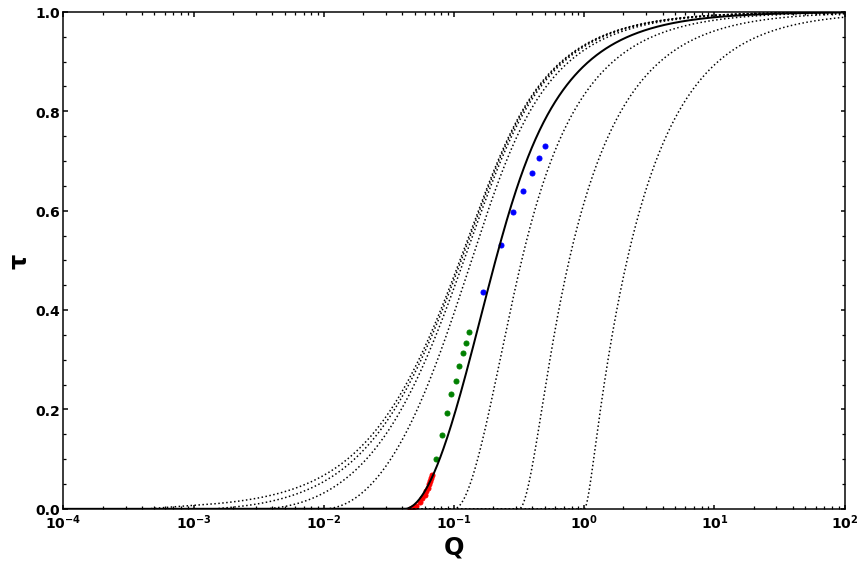

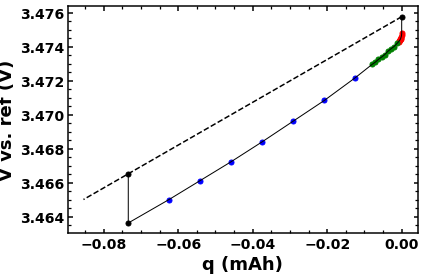

In [4]:
# Plot Atlung curve with various R_Ohm
R_Ohm = np.array([0, 1e-3, 3.1622e-3, 1e-2, 4.1622e-2, 1e-1, 3.1622e-1, 1])
#R_Ohm = np.array([4.1622e-2])
nQ = 1000
A = 3
B = 5

tau_thr1 = np.zeros(len(R_Ohm))
Q_thr1 = np.zeros(len(R_Ohm))
tau_thr2 = np.zeros(len(R_Ohm))
Q_thr2 = np.zeros(len(R_Ohm))
with plt.style.context('grapher'):                    
        
    plt.figure(figsize = (12, 8))

    Qdata1 = np.multiply([936.9481272, 982.020253, 1042.269145, 1125.729004, 1171.061585, 1241.139349, 1260.027133, 1306.831193, 1318.09162, 1344.926151, 1361.610518, 1394.621839], 4.8622e-5)
    taudata1 = [5.25006E-05, 0.000762789, 0.005267077, 0.013235003, 0.021261131, 0.02811711, 0.035631382, 0.042006877, 0.049234325, 0.055686901, 0.062348378, 0.068042586]
    
    Qdata2 = np.multiply([1495.507507, 1674.794112, 1802.17781, 1947.694541, 2126.962134, 2263.775466, 2391.172472, 2547.194879, 2666.960726], 4.8622e-5)
    taudata2 = [0.099626092, 0.148667614, 0.193645323, 0.230518091, 0.258102397, 0.286675559, 0.313220784, 0.333292378, 0.355819606]

    Qdata3 = np.multiply([3413.088058, 4691.579021, 5850.304137, 7009.766893, 8125.317216, 9186.439924, 10245.73184], 4.8622e-5)
    taudata3 = [0.436541704, 0.530730191, 0.596546795, 0.640533252, 0.675667141, 0.706478165, 0.731039196]
    
    plt.semilogx(Qdata1, taudata1, 'or', markersize=5)
    plt.semilogx(Qdata2, taudata2, 'og', markersize=5)
    plt.semilogx(Qdata3, taudata3, 'ob', markersize=5)
    
    for i in range(len(R_Ohm)):
        print(R_Ohm[i])
        Q_arr = np.logspace(-4, 2, nQ)
        tau_sol = np.zeros(nQ)
        tau_guess = 0.5
        for j in range(nQ):
            Q = Q_arr[j]
            func = lambda tau: tau - 1 + (1/(A*Q))*(1/B - 2*(np.sum(np.exp(-alphas*tau*Q)/alphas))) + R_Ohm[i]/Q if R_Ohm[i]<Q else tau 
            tau_sol[j] = fsolve(func, tau_guess, factor=1.)
            if tau_sol[j] < 0:
                tau_sol[j] = 0

        for j in range(nQ):
            Q = Q_arr[j]
            if 1/B*0.01 < 2*(np.sum(np.exp(-alphas*tau_sol[j]*Q)/alphas)):
                tau_thr1[i] = tau_sol[j]
                Q_thr1[i] = Q_arr[j]

            if 1/B*0.5 < 2*(np.sum(np.exp(-alphas*tau_sol[j]*Q)/alphas)):
                tau_thr2[i] = tau_sol[j]
                Q_thr2[i] = Q_arr[j]
        
        if R_Ohm[i] < 1e-1 and R_Ohm[i] > 1e-2: 
            plt.semilogx(Q_arr, tau_sol, '-k', linewidth=2)
        else:
            plt.semilogx(Q_arr, tau_sol, ':k')
        
        
        D = 8.68e-12
        r = 1.461e-4
        I = 6.9e-6
        dqdV = 0.000179
        V_arr = Q_arr/3600/D*r**2*I/dqdV
        #for i in range(len(V_arr)):
            #print(V_arr[i])
        #for i in range(len(V_arr)):
            #print(tau_sol[i])
        #print(np.transpose([Q_arr, tau_sol]).tolist())
    


    #plt.semilogx(Q_thr1, tau_thr1)
    #plt.semilogx(Q_thr2, tau_thr2)
    #plt.xlabel('$Q = 3600 n_{eff} D/ r^2$')
    #plt.ylabel('Fractional Capacity')
    plt.xlabel('Q', weight='bold', fontsize=24)
    plt.ylabel('τ', weight='bold', fontsize=24)
    plt.xlim([1e-4, 1e2])
    plt.ylim([0, 1])
    
    plt.savefig('abstract1.png')
    
    plt.figure()
    
    qdata0 = [0, -0.073422326, -0.073422326]
    Vdata0 = [3.475780548, 3.4636178, 3.466519215]
    qdata00 = [0, -0.085450475]
    Vdata00 = [3.475780548, 3.46500201]

    qdata1 = [-4.10252E-07, -4.57848E-05, -0.000124259, -0.000207653, -0.000291047, -0.000374442, -0.000457838, -0.000541234, -0.00062463, -0.000708027, -0.000791423]
    Vdata1 = [3.474794876, 3.474684078, 3.474596278, 3.474548588, 3.474474866, 3.474454996, 3.474405758, 3.474393912, 3.474365682, 3.47434813, 3.474313402]
    
    qdata2 = [-0.001242605, -0.002076583, -0.002910557, -0.00374453, -0.004578501, -0.00541247, -0.006246446, -0.00708042, -0.0079144]
    Vdata2 = [3.47420727, 3.47401866, 3.473884652, 3.473731568, 3.473542978, 3.47339905, 3.473265028, 3.473100892, 3.472974898]
    
    qdata3 = [-0.012426383, -0.020766549, -0.0291068, -0.037446976, -0.045787256, -0.054127439, -0.062467646]
    Vdata3 = [3.47218997, 3.470844994, 3.469626012, 3.468406254, 3.467232692, 3.466116388, 3.46500201]
    
    qdataall = np.concatenate(([qdata0[0]], qdata1, qdata2, qdata3, qdata0[1:3]))
    Vdataall = np.concatenate(([Vdata0[0]], Vdata1, Vdata2, Vdata3, Vdata0[1:3]))

    plt.plot(qdata1, Vdata1, 'or', markersize=5)
    plt.plot(qdata2, Vdata2, 'og', markersize=5)
    plt.plot(qdata3, Vdata3, 'ob', markersize=5)
    plt.plot(qdataall, Vdataall, '-', linewidth=1)
    plt.plot(qdata0, Vdata0, 'ok', markersize=5)
    plt.plot(qdata00, Vdata00, '--k', markersize=5)

    
    plt.xlabel('q (mAh)', weight='bold', fontsize=18)
    plt.ylabel('V vs. ref (V)', weight='bold', fontsize=18)
    
    plt.savefig('abstract2.png')


In [3]:
palphas = []
calphas = []
salphas = []
nalpha = 1500
for i in np.arange(4, 600):
    pg = lambda a: np.sin(a)
    psol = fsolve(pg, i)
    palphas.append(psol)
    
    cg = lambda a: jv(1, a)
    csol = fsolve(cg, i)
    calphas.append(csol)
    
    sg = lambda a: a/np.tan(a) - 1
    ssol = fsolve(sg, i)
    salphas.append(ssol)

palphas = np.unique(np.around(palphas, 8))**2
palphas = palphas[:nalpha]

calphas = np.unique(np.around(calphas, 8))**2
calphas = calphas[:nalpha]
    
salphas = np.unique(np.around(salphas, 8))**2
salphas = salphas[:nalpha]

(0.0, 1.0)

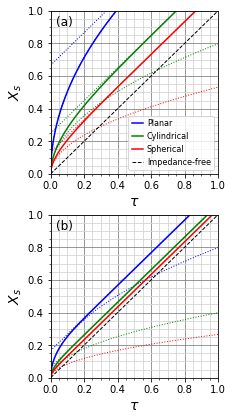

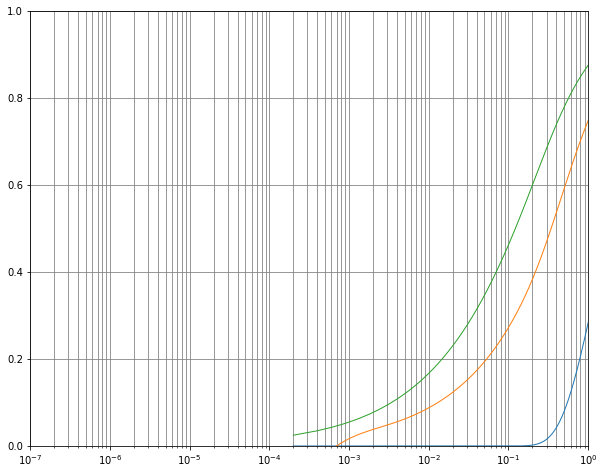

In [33]:
#Figure 2
tau_arr = np.linspace(1e-4, 1, 10000)
Q_arr = [0.5, 2]
title = ['(a)', '(b)']

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(3, 6.75))
plt.subplots_adjust(hspace = 0.25)

pQest_arr = np.zeros((len(Q_arr), len(tau_arr)))
cQest_arr = np.zeros((len(Q_arr), len(tau_arr)))
sQest_arr = np.zeros((len(Q_arr), len(tau_arr)))

pQerr_arr = np.zeros((len(Q_arr), len(tau_arr)))
cQerr_arr = np.zeros((len(Q_arr), len(tau_arr)))
sQerr_arr = np.zeros((len(Q_arr), len(tau_arr)))

for Q in range(len(Q_arr)):
    pifunc = lambda tau: 2*np.sqrt(tau)/(1*np.sqrt(np.pi*Q_arr[Q]))
    cifunc = lambda tau: 2*np.sqrt(tau)/(2*np.sqrt(np.pi*Q_arr[Q]))
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q]))

    pffunc = lambda tau: tau + 1/(1*3*Q_arr[Q])
    cffunc = lambda tau: tau + 1/(2*4*Q_arr[Q])
    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q])

    pfunc = lambda tau: tau + (1/(1*Q_arr[Q]))*(1/3 - 2*(np.sum(np.exp(-palphas*tau*Q_arr[Q])/palphas)))
    cfunc = lambda tau: tau + (1/(2*Q_arr[Q]))*(1/4 - 2*(np.sum(np.exp(-calphas*tau*Q_arr[Q])/calphas)))
    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas)))

    piX_sol = np.zeros(len(tau_arr))
    ciX_sol = np.zeros(len(tau_arr))
    siX_sol = np.zeros(len(tau_arr))

    pfX_sol = np.zeros(len(tau_arr))
    cfX_sol = np.zeros(len(tau_arr))
    sfX_sol = np.zeros(len(tau_arr))

    pX_sol = np.zeros(len(tau_arr))
    cX_sol = np.zeros(len(tau_arr))
    sX_sol = np.zeros(len(tau_arr))

    for i in range(len(tau_arr)):
        piX_sol[i] = pifunc(tau_arr[i])
        ciX_sol[i] = cifunc(tau_arr[i])
        siX_sol[i] = sifunc(tau_arr[i])

        pfX_sol[i] = pffunc(tau_arr[i])
        cfX_sol[i] = cffunc(tau_arr[i])
        sfX_sol[i] = sffunc(tau_arr[i])

        pX_sol[i] = pfunc(tau_arr[i])
        cX_sol[i] = cfunc(tau_arr[i])
        sX_sol[i] = sfunc(tau_arr[i])    
        
        pQest_arr[Q][i] = np.power(2, 2)*tau_arr[i]/(np.pi*np.power(1*pX_sol[i], 2))
        cQest_arr[Q][i] = np.power(2, 2)*tau_arr[i]/(np.pi*np.power(2*cX_sol[i], 2))
        sQest_arr[Q][i] = np.power(2, 2)*tau_arr[i]/(np.pi*np.power(3*sX_sol[i], 2))
        
        pQerr_arr[Q][i] = (Q_arr[Q] - pQest_arr[Q][i])/Q_arr[Q]
        cQerr_arr[Q][i] = (Q_arr[Q] - cQest_arr[Q][i])/Q_arr[Q]
        sQerr_arr[Q][i] = (Q_arr[Q] - sQest_arr[Q][i])/Q_arr[Q]
            
    axs[Q].plot(tau_arr, piX_sol, ':b')
    axs[Q].plot(tau_arr, ciX_sol, ':g')
    axs[Q].plot(tau_arr, siX_sol, ':r')

    axs[Q].plot(tau_arr, pfX_sol, ':b')
    axs[Q].plot(tau_arr, cfX_sol, ':g')
    axs[Q].plot(tau_arr, sfX_sol, ':r')
    
    axs[Q].plot(tau_arr, pX_sol, '-b', linewidth=1.5, label="Planar")
    axs[Q].plot(tau_arr, cX_sol, '-g', linewidth=1.5, label="Cylindrical")
    axs[Q].plot(tau_arr, sX_sol, '-r', linewidth=1.5, label="Spherical")
    
    axs[Q].plot(tau_arr, tau_arr, '--k', label="Impedance-free")
    
    axs[Q].set_xlim([0, 1])
    axs[Q].set_ylim([0, 1])
    
    axs[Q].set_xlabel('$τ$')
    axs[Q].set_ylabel('$X_{s}$')
    
    axs[Q].annotate(title[Q], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment='left', verticalalignment='top', fontsize = 12)

    axs[Q].xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axs[Q].yaxis.set_minor_locator(ticker.AutoMinorLocator())
    axs[Q].grid(which = 'minor', color = 'lightgrey')
    
axs[0].legend(frameon = True, fontsize = 8)
plt.savefig('fig2.png', bbox_inches="tight")

plt.figure(2, figsize=(10, 8))
plt.semilogx(Q_arr[1]*tau_arr, pQerr_arr[1])
plt.semilogx(Q_arr[1]*tau_arr, cQerr_arr[1])
plt.semilogx(Q_arr[1]*tau_arr, sQerr_arr[1])
plt.xlim([1e-7, 1])
plt.ylim([0, 1])


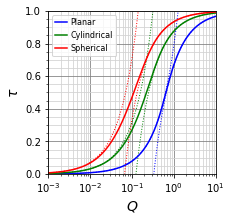

In [34]:
#Figure 3
nQ = 1000
Q_arr = np.logspace(-3, 1, nQ)

plt.figure(figsize = (3, 3))

pitau_sol = np.zeros(len(Q_arr))
citau_sol = np.zeros(len(Q_arr))
sitau_sol = np.zeros(len(Q_arr))

pftau_sol = np.zeros(len(Q_arr))
cftau_sol = np.zeros(len(Q_arr))
sftau_sol = np.zeros(len(Q_arr))

ptau_sol = np.zeros(len(Q_arr))
ctau_sol = np.zeros(len(Q_arr))
stau_sol = np.zeros(len(Q_arr))

for Q in range(len(Q_arr)):
    pifunc = lambda tau: 2*np.sqrt(tau)/(1*np.sqrt(np.pi*Q_arr[Q])) - 1
    cifunc = lambda tau: 2*np.sqrt(tau)/(2*np.sqrt(np.pi*Q_arr[Q])) - 1
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) - 1

    pffunc = lambda tau: tau + 1/(1*3*Q_arr[Q]) - 1
    cffunc = lambda tau: tau + 1/(2*4*Q_arr[Q]) - 1
    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q]) - 1

    pfunc = lambda tau: tau + (1/(1*Q_arr[Q]))*(1/3 - 2*(np.sum(np.exp(-palphas*tau*Q_arr[Q])/palphas))) - 1
    cfunc = lambda tau: tau + (1/(2*Q_arr[Q]))*(1/4 - 2*(np.sum(np.exp(-calphas*tau*Q_arr[Q])/calphas))) - 1
    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) - 1
    
    tau_guess = 0.5
    
    pitau_sol[Q] = fsolve(pifunc, tau_guess, factor=1.)
    citau_sol[Q] = fsolve(cifunc, tau_guess, factor=1.)
    sitau_sol[Q] = fsolve(sifunc, tau_guess, factor=1.)
            
    pftau_sol[Q] = fsolve(pffunc, tau_guess, factor=1.)
    cftau_sol[Q] = fsolve(cffunc, tau_guess, factor=1.)
    sftau_sol[Q] = fsolve(sffunc, tau_guess, factor=1.)
    
    ptau_sol[Q] = fsolve(pfunc, tau_guess, factor=1.)
    if ptau_sol[Q] < 0:
        ptau_sol[Q] = 0
    elif ptau_sol[Q] > pitau_sol[Q]:
        ptau_sol[Q] = pitau_sol[Q]
    ctau_sol[Q] = fsolve(cfunc, tau_guess, factor=1.)
    if ctau_sol[Q] < 0:
        ctau_sol[Q] = 0
    elif ctau_sol[Q] > citau_sol[Q]:
        ctau_sol[Q] = citau_sol[Q]
    stau_sol[Q] = fsolve(sfunc, tau_guess, factor=1.)
    if stau_sol[Q] < 0:
        stau_sol[Q] = 0
    elif stau_sol[Q] > sitau_sol[Q]:
        stau_sol[Q] = sitau_sol[Q]

plt.semilogx(Q_arr, pitau_sol, ':b')
plt.semilogx(Q_arr, citau_sol, ':g')
plt.semilogx(Q_arr, sitau_sol, ':r')

plt.semilogx(Q_arr, pftau_sol, ':b')
plt.semilogx(Q_arr, cftau_sol, ':g')
plt.semilogx(Q_arr, sftau_sol, ':r')

plt.semilogx(Q_arr, ptau_sol, '-b', linewidth=1.5, label="Planar")
plt.semilogx(Q_arr, ctau_sol, '-g', linewidth=1.5, label="Cylindrical")
plt.semilogx(Q_arr, stau_sol, '-r', linewidth=1.5, label="Spherical")

plt.xlim([1e-3, 1e1])
plt.ylim([0, 1])

plt.gca().xaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
plt.gca().xaxis.set_major_locator(ticker.LogLocator(numticks = 10))
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.gca().grid(which = 'minor', color = 'lightgrey')

plt.xlabel('$Q$')
plt.ylabel('$τ$')

plt.legend(fontsize = 8, frameon = True)
plt.savefig('fig3.png', bbox_inches="tight")

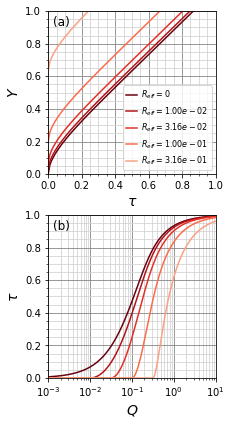

In [37]:
#Figure 4
fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize=(3, 6.75))
plt.subplots_adjust(hspace = .25)

colors = plt.get_cmap('Reds_r')(np.linspace(0,1,7))
title = ['(a)', '(b)']

#Figure 4a
Q = 0.5
Reff = [0, np.power(10., -2.), np.power(10., -1.5), np.power(10., -1.), np.power(10., -0.5)]
tau_arr = np.linspace(0, 1, 101)
sX_sol = np.zeros(len(tau_arr))

for R in range(len(Reff)):
    sfunc = lambda tau: tau + (1/(3*Q))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q)/salphas))) + Reff[R]/Q

    for i in range(len(tau_arr)):
        sX_sol[i] = sfunc(tau_arr[i])    
        
    if R == 0:
        label = '$R_{eff} = 0$'
    else:
        label = '$R_{eff} = $' + '${0:.2e}$'.format(Reff[R])
            
    axs[0].plot(tau_arr, sX_sol, '-', linewidth=1.5, label=label, color = colors[R])

axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 1])

axs[0].set_xlabel('$τ$')
axs[0].set_ylabel('$Y$')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].grid(which = 'minor', color = 'lightgrey')

axs[0].annotate(title[0], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment='left', verticalalignment='top', fontsize = 12)

#Figure 4b
nQ = 1000
Q_arr = np.logspace(-3, 1, nQ)
stau_sol = np.zeros(len(Q_arr))

for R in range(len(Reff)):
    for Q in range(len(Q_arr)):
        sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + Reff[R]/Q_arr[Q] - 1

        tau_guess = 0.5
        stau_sol[Q] = fsolve(sfunc, tau_guess, factor=1.)
        if stau_sol[Q] < 0:
                stau_sol[Q] = 0

    axs[1].semilogx(Q_arr, stau_sol, '-', linewidth = 1.5, color = colors[R], label = "Spherical")
    
axs[1].set_xlim([1e-3, 1e1])
axs[1].set_ylim([0, 1])

axs[1].set_xlabel('$Q$')
axs[1].set_ylabel('$τ$')

axs[1].xaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].xaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1].grid(which = 'minor', color = 'lightgrey')

axs[0].legend(fontsize = 8, frameon = True)

axs[1].annotate(title[1], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment='left', verticalalignment='top', fontsize = 12)

plt.savefig('fig4.png', bbox_inches="tight")

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Discharge\270 NM9505 30C Discharge Fitted (sphere).xlsx
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Charge\270 NM9505 30C Charge Fitted (sphere).xlsx


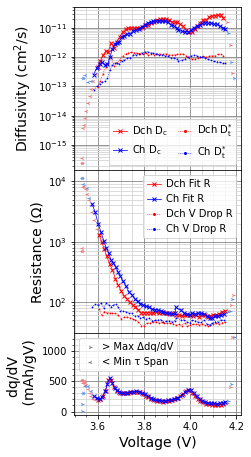

In [22]:
#Figure 5
path = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data'
cells = ['270']
mincapspan = 0.5
maxdqdVchange = 2

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(3, 7.5), sharex='col',
gridspec_kw={'height_ratios': [2,2,1], 'hspace': 0.0})

# Find and read file data into dataframes
for cell in cells:
    cellpath = Path(path) / cell
    for halfcyclepath in sorted(cellpath.iterdir(), reverse=True):
        if halfcyclepath.is_dir():
            for fitfile in halfcyclepath.iterdir():
                if fitfile.is_file() and "harge Fitted" in str(fitfile):
                    if "Discharge Fitted" in str(fitfile):
                        halfcycle = 'Discharge'
                    elif "Charge Fitted" in str(fitfile):
                        halfcycle = 'Charge'
                    dfnew = pd.read_excel(fitfile)
                    print(fitfile)

                    # Remove datapoints where 
                    # dq/dV change between subsequent datapoint is greater than the max dqdV factor or
                    # the capacity span is less the minimum capacity span.
                    baddqdv = ~(((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] > 0))[1:-1]
                    badcapspan = dfnew['Cap Span'] < mincapspan
                    keep = ~(baddqdv|badcapspan)

                    # Settings
                    if halfcycle == 'Discharge':
                        markerA = 'rx-'
                        markerB = 'r.:'
                        color = 'lightcoral'
                    elif halfcycle == 'Charge':
                        markerA = 'bx-'
                        markerB = 'b.:'
                        color = 'cornflowerblue'
                    else:
                        markerA = 'kx-'
                        markerB = 'k.:'
                        color = 'grey'
                    
                    # Plot individual cells with outliers removed
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dc (cm^2/s)'], markerA)
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dt* (cm^2/s)'], markerB, markersize = 1.5)                            
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rfit (Ohm)'], markerA)
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rdrop (Ohm)'], markerB, markersize = 1.5)
                    axs[2].plot(dfnew[keep]['Voltage (V)'], dfnew[keep]['dq/dV (mAh/gV)'], markerA)

                    # Plot individual cell outliers (dqdv)
                    axs[0].semilogy(dfnew[baddqdv]['Voltage (V)'], dfnew[baddqdv]['Dc (cm^2/s)'], marker = '4', color = color, linestyle = 'None')
                    #axs[0].semilogy(dfnew[baddqdv]['Voltage (V)'], dfnew[baddqdv]['Dt* (cm^2/s)'], marker = '4', color = color, linestyle = 'None')                            
                    axs[1].semilogy(dfnew[baddqdv]['Initial Voltage (V)'], dfnew[baddqdv]['Rfit (Ohm)'], marker = '4', color = color, linestyle = 'None')                       
                    #axs[1].semilogy(dfnew[baddqdv]['Initial Voltage (V)'], dfnew[baddqdv]['Rdrop (Ohm)'], marker = '4', color = color, linestyle = 'None')
                    axs[2].plot(dfnew[baddqdv]['Voltage (V)'], dfnew[baddqdv]['dq/dV (mAh/gV)'], marker = '4', color = color, linestyle = 'None')

                    # Plot individual cell outliers (capspan)
                    axs[0].semilogy(dfnew[badcapspan]['Voltage (V)'], dfnew[badcapspan]['Dc (cm^2/s)'], marker = '3', color = color, linestyle = 'None')
                    #axs[0].semilogy(dfnew[badcapspan]['Voltage (V)'], dfnew[badcapspan]['Dt* (cm^2/s)'], marker = '3', color = color, linestyle = 'None')                            
                    axs[1].semilogy(dfnew[badcapspan]['Initial Voltage (V)'], dfnew[badcapspan]['Rfit (Ohm)'], marker = '3', color = color, linestyle = 'None')                      
                    #axs[1].semilogy(dfnew[badcapspan]['Initial Voltage (V)'], dfnew[badcapspan]['Rdrop (Ohm)'], marker = '3', color = color, linestyle = 'None')
                    axs[2].plot(dfnew[badcapspan]['Voltage (V)'], dfnew[badcapspan]['dq/dV (mAh/gV)'], marker = '3', color = color, linestyle = 'None')

axs[0].set_ylabel('Diffusivity (cm$\mathregular{^{2}}$/s)')
axs[1].set_ylabel('Resistance (Ω)')
axs[2].set_xlabel('Voltage (V)')
axs[2].set_ylabel('dq/dV \n (mAh/gV)')
#axs[1].set_xlabel('x in Li$\mathregular{_{x}N_{0.95}Mn_{0.05}O_{2}}$')

axs[0].semilogy([], [], 'rx-', label='Dch D$\mathregular{_{c}}$')
axs[0].semilogy([], [], 'bx-', label='Ch D$\mathregular{_{c}}$')
axs[0].semilogy([], [], 'r.:', label='Dch D$\mathregular{_{t}^{*}}$')
axs[0].semilogy([], [], 'b.:', label='Ch D$\mathregular{_{t}^{*}}$')
axs[0].legend(frameon = True, ncol = 2)

axs[1].semilogy([], [], 'rx-', label='Dch Fit R')
axs[1].semilogy([], [], 'bx-', label='Ch Fit R')
axs[1].semilogy([], [], 'r.:', label='Dch V Drop R')
axs[1].semilogy([], [], 'b.:', label='Ch V Drop R')
axs[1].legend(frameon = True)

axs[2].plot([], [], marker = '4', color = 'grey', linestyle = 'None', label='> Max Δdq/dV')
axs[2].plot([], [], marker = '3', color = 'grey', linestyle = 'None', label='< Min τ Span')
axs[2].legend(frameon = True)

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0].grid(which = 'minor', color = 'lightgrey')
axs[1].grid(which = 'minor', color = 'lightgrey')
axs[2].grid(which = 'minor', color = 'lightgrey')

plt.savefig('fig5.png', bbox_inches = 'tight')

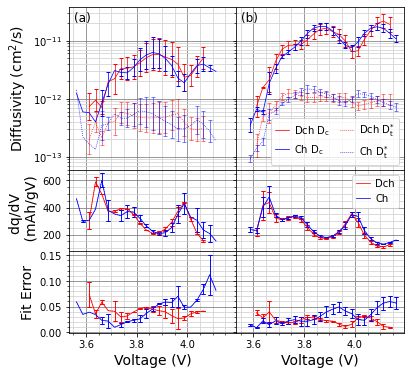

In [18]:
# Figure 6
path = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data'
mats = ['NM9505 30C Old', 'NM9505 30C']
binfiles = ['NM9505 30C Old (215, 217).xlsx', 'NM9505 30C (266, 269, 270).xlsx']

title = ['(a)', '(b)']

dfD = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'Discharge'), pd.read_excel(Path(path) / mats[1] / binfiles[1], sheet_name = 'Discharge')]
dfC = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'Charge'), pd.read_excel(Path(path) / mats[1] / binfiles[1], sheet_name = 'Charge')]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(6, 6), sharex=True, sharey='row',
gridspec_kw={'height_ratios': [2,1,1], 'hspace': 0.0, 'width_ratios': [1,1], 'wspace': 0.0})

axs[0, 1].semilogy([], [], 'r-', label='Dch D$\mathregular{_{c}}$')
axs[0, 1].semilogy([], [], 'b-', label='Ch D$\mathregular{_{c}}$')
axs[0, 1].semilogy([], [], 'r:', label='Dch D$\mathregular{_{t}^{*}}$')
axs[0, 1].semilogy([], [], 'b:', label='Ch D$\mathregular{_{t}^{*}}$')
axs[0, 1].legend(frameon = True, ncol = 2)

axs[1, 1].plot([], [], 'r-', label='Dch')
axs[1, 1].plot([], [], 'b-', label='Ch')
axs[1, 1].legend(frameon = True)

for i in range(len(dfD)):
    yerrDDc = [dfD[i]['Dc (cm^2/s)']*(1 - 1/dfD[i]['Dc geoSTD']), dfD[i]['Dc (cm^2/s)']*(dfD[i]['Dc geoSTD'] - 1)]
    yerrDDt = [dfD[i]['Dt* (cm^2/s)']*(1 - 1/dfD[i]['Dt* geoSTD']), dfD[i]['Dt* (cm^2/s)']*(dfD[i]['Dt* geoSTD'] - 1)]
    axs[0, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Dc (cm^2/s)'], yerr = yerrDDc, fmt = 'r-')
    axs[0, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Dt* (cm^2/s)'], yerr = yerrDDt, fmt = 'r:', elinewidth = 0.5, markeredgewidth = 0.5)

    yerrCDc = [dfC[i]['Dc (cm^2/s)']*(1 - 1/dfC[i]['Dc geoSTD']), dfC[i]['Dc (cm^2/s)']*(dfC[i]['Dc geoSTD'] - 1)]
    yerrCDt = [dfC[i]['Dt* (cm^2/s)']*(1 - 1/dfC[i]['Dt* geoSTD']), dfC[i]['Dt* (cm^2/s)']*(dfC[i]['Dt* geoSTD'] - 1)]
    axs[0, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Dc (cm^2/s)'], yerr = yerrCDc, fmt = 'b-')
    axs[0, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Dt* (cm^2/s)'], yerr = yerrCDt, fmt = 'b:', elinewidth = 0.5, markeredgewidth = 0.5)
    
    axs[1, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['dq/dV (mAh/gV)'], yerr = dfD[i]['dq/dV STD'], fmt = 'r-')
    axs[1, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['dq/dV (mAh/gV)'], yerr = dfD[i]['dq/dV STD'], fmt = 'r:')
    
    axs[1, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['dq/dV (mAh/gV)'], yerr = dfC[i]['dq/dV STD'], fmt = 'b-')
    axs[1, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['dq/dV (mAh/gV)'], yerr = dfC[i]['dq/dV STD'], fmt = 'b:')

    axs[2, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Fit Error'], yerr = dfD[i]['Fit Error STD'], fmt = 'r-')
    axs[2, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Fit Error'], yerr = dfD[i]['Fit Error STD'], fmt = 'r:')
    
    axs[2, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Fit Error'], yerr = dfC[i]['Fit Error STD'], fmt = 'b-')
    axs[2, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Fit Error'], yerr = dfC[i]['Fit Error STD'], fmt = 'b:')

axs[0, 0].set_ylabel('Diffusivity (cm$\mathregular{^{2}}$/s)')
axs[2, 0].set_xlabel('Voltage (V)')
axs[1, 0].set_ylabel('dq/dV \n (mAh/gV)')
axs[2, 0].set_ylabel('Fit Error')
axs[2, 1].set_xlabel('Voltage (V)')

axs[0, 0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0, 0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0, 0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[0, 1].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1, 0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2, 0].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0, 0].grid(which = 'minor', color = 'lightgrey')
axs[1, 0].grid(which = 'minor', color = 'lightgrey')
axs[2, 0].grid(which = 'minor', color = 'lightgrey')
axs[0, 1].grid(which = 'minor', color = 'lightgrey')
axs[1, 1].grid(which = 'minor', color = 'lightgrey')
axs[2, 1].grid(which = 'minor', color = 'lightgrey')

axs[0, 0].annotate(title[0], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment='left', verticalalignment='top', fontsize = 12)
axs[0, 1].annotate(title[1], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment='left', verticalalignment='top', fontsize = 12)

plt.savefig('fig6.png', bbox_inches = 'tight')

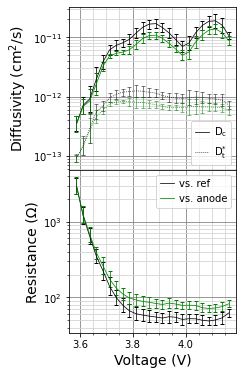

In [19]:
#Figure 7
path = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data'
mats = ['NM9505 30C', 'NM9505 30C-2e']
binfiles = ['NM9505 30C (266, 269, 270).xlsx', 'NM9505 30C-2e (266, 269, 270).xlsx']

df = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'All'), pd.read_excel(Path(path) / mats[1] / binfiles[1], sheet_name = 'All')]

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(3, 6), sharex='col',
gridspec_kw={'height_ratios': [1,1], 'hspace': 0.0})

axs[0].semilogy([], [], 'k-', label='D$\mathregular{_{c}}$')
axs[0].semilogy([], [], 'k:', label='D$\mathregular{_{t}^{*}}$')
axs[0].legend(frameon = True)

axs[1].semilogy([], [], 'k-', label='vs. ref')
axs[1].semilogy([], [], 'g-', label='vs. anode')
axs[1].legend(frameon = True)

color = ['k', 'g']
for i in range(len(dfD)):
    yerrDc = [df[i]['Dc (cm^2/s)']*(1 - 1/df[i]['Dc geoSTD']), df[i]['Dc (cm^2/s)']*(df[i]['Dc geoSTD'] - 1)]
    yerrDt = [df[i]['Dt* (cm^2/s)']*(1 - 1/df[i]['Dt* geoSTD']), df[i]['Dt* (cm^2/s)']*(df[i]['Dt* geoSTD'] - 1)]
    axs[0].errorbar(df[i]['Voltage (V)'], df[i]['Dc (cm^2/s)'], yerr = yerrDc, fmt = '-', color = color[i])
    axs[0].errorbar(df[i]['Voltage (V)'], df[i]['Dt* (cm^2/s)'], yerr = yerrDt, fmt = ':', color = color[i], elinewidth = 0.5, markeredgewidth = 0.5)
    
    yerrR = [df[i]['Rfit (Ohm)']*(1 - 1/df[i]['Rfit geoSTD']), df[i]['Rfit (Ohm)']*(df[i]['Rfit geoSTD'] - 1)]
    axs[1].errorbar(df[i]['Voltage (V)'], df[i]['Rfit (Ohm)'], yerr = yerrR, fmt = '-', color = color[i])
    
axs[0].set_ylabel('Diffusivity (cm$\mathregular{^{2}}$/s)')
axs[1].set_xlabel('Voltage (V)')
axs[1].set_ylabel('Resistance (Ω)')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))

axs[0].grid(which = 'minor', color = 'lightgrey')
axs[1].grid(which = 'minor', color = 'lightgrey')

plt.savefig('fig7.png', bbox_inches = 'tight')

Found data for material: C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\NMC640 30C (243, 246, 259).xlsx
Found data for material: C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\NMC811 30C (239, 272, 276).xlsx
Found data for material: C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\NM9505 30C (266, 269, 270).xlsx


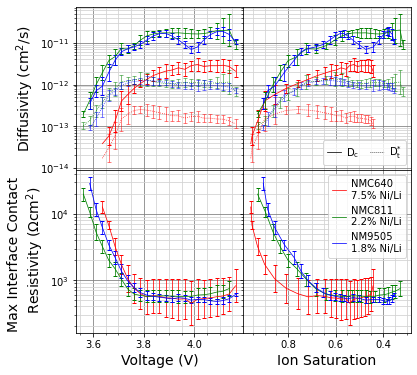

In [21]:
#Figure 8

path = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data'
mats = ['NMC640 30C', 'NMC811 30C', 'NM9505 30C']
matname = 'NM9505 30C'

folder = Path(path)
        
# Generate plot for individual cells
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(6, 6), sharex='col', sharey='row',
gridspec_kw={'height_ratios': [1,1], 'hspace': 0.0, 'width_ratios': [1,1], 'wspace': 0.0})

axs[0, 1].semilogy([], [], 'k-', label='D$\mathregular{_{c}}$')
axs[0, 1].semilogy([], [], 'k:', label='D$\mathregular{_{t}^{*}}$')
axs[0, 1].legend(frameon = True, ncol = 2, loc = 'lower right')

axs[0, 0].set_ylabel('Diffusivity (cm$\mathregular{^{2}}$/s)')
axs[1, 0].set_xlabel('Voltage (V)')
axs[1, 0].set_ylabel('Max Interface Contact \n Resistivity (Ωcm$\mathregular{^{2}}$)')
axs[1, 1].set_xlabel('Ion Saturation')

axs[0, 1].invert_xaxis()

axs[0, 0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0, 0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0, 0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[0, 1].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1, 0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1, 0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))

axs[0, 0].grid(which = 'minor', color = 'lightgrey')
axs[1, 0].grid(which = 'minor', color = 'lightgrey')
axs[0, 1].grid(which = 'minor', color = 'lightgrey')
axs[1, 1].grid(which = 'minor', color = 'lightgrey') 

colors = ['r', 'g', 'b', 'k']

labels = ['NMC640\n7.5% Ni/Li', 'NMC811\n2.2% Ni/Li', 'NM9505\n1.8% Ni/Li']

# Find and read file data into dataframes
i = 0
for mat in mats:
    matpath = folder / mat
    for filepath in matpath.iterdir():
        if mat + ' (' in str(filepath):
            print("Found data for material: {}".format(filepath))
            df = pd.read_excel(filepath, sheet_name = 'All')

            # Plot dataframe
            yerrDc = [df['Dc (cm^2/s)']*(1 - 1/df['Dc geoSTD']), df['Dc (cm^2/s)']*(df['Dc geoSTD'] - 1)]
            yerrDt = [df['Dt* (cm^2/s)']*(1 - 1/df['Dt* geoSTD']), df['Dt* (cm^2/s)']*(df['Dt* geoSTD'] - 1)]
            axs[0, 0].errorbar(df['Voltage (V)'], df['Dc (cm^2/s)'], yerr = yerrDc, fmt = '-', color = colors[i])
            axs[0, 0].errorbar(df['Voltage (V)'], df['Dt* (cm^2/s)'], yerr = yerrDt, fmt = ':', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5)
            axs[0, 1].errorbar(df['SOC'], df['Dc (cm^2/s)'], yerr = yerrDc, fmt = '-', color = colors[i])
            axs[0, 1].errorbar(df['SOC'], df['Dt* (cm^2/s)'], yerr = yerrDt, fmt = ':', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5)
            yerrmicR = [df['micR (Ohmcm^2)']*(1 - 1/df['micR geoSTD']), df['micR (Ohmcm^2)']*(df['micR geoSTD'] - 1)]
            axs[1, 0].errorbar(df['Voltage (V)'], df['micR (Ohmcm^2)'], yerr = yerrmicR, color = colors[i], fmt = '-')
            axs[1, 1].errorbar(df['SOC'], df['micR (Ohmcm^2)'], yerr = yerrmicR, fmt = '-', color = colors[i])
            axs[1, 1].semilogy([], [], color = colors[i], label = labels[i])
            
            i = i + 1

axs[1, 1].legend(frameon = True)       

plt.savefig('fig8.png', bbox_inches = 'tight')

plt.show()
plt.close()

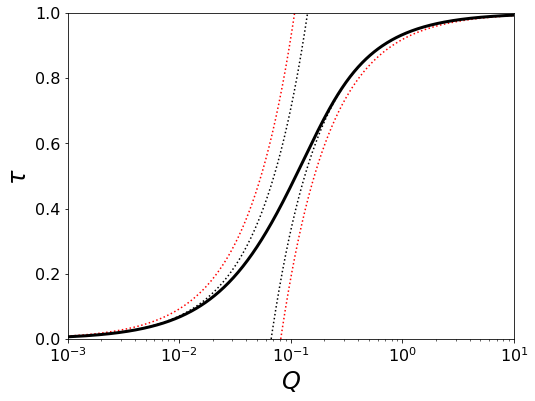

In [30]:
#Figure n (particle size V)
nQ = 1000
Reff = 0.0

Q_arr = np.logspace(-4, 2, nQ)

plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

plt.figure(figsize = (8, 6))

sitau_sol = np.zeros(len(Q_arr))
sivtau_sol = np.zeros(len(Q_arr))
sftau_sol = np.zeros(len(Q_arr))
sfvtau_sol = np.zeros(len(Q_arr))
stau_sol = np.zeros(len(Q_arr))

for Q in range(len(Q_arr)):
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) + Reff/Q_arr[Q] - 1
    sivfunc = lambda tau: 0.8749*2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) + Reff/Q_arr[Q] - 1
    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q]) + Reff/Q_arr[Q] - 1
    sfvfunc = lambda tau: tau + 1.219*1/(3*5*Q_arr[Q]) + Reff/Q_arr[Q] - 1
    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + Reff/Q_arr[Q] - 1
    
    tau_guess = 0.5
    
    sitau_sol[Q] = fsolve(sifunc, tau_guess, factor=1.)
    sivtau_sol[Q] = fsolve(sivfunc, tau_guess, factor=1.)
    sftau_sol[Q] = fsolve(sffunc, tau_guess, factor=1.)
    sfvtau_sol[Q] = fsolve(sfvfunc, tau_guess, factor=1.)
    stau_sol[Q] = fsolve(sfunc, tau_guess, factor=1.)
    if stau_sol[Q] < 0:
            stau_sol[Q] = 0

plt.semilogx(Q_arr, sitau_sol, ':k')
plt.semilogx(Q_arr, sivtau_sol, ':r')
plt.semilogx(Q_arr, sftau_sol, ':k')
plt.semilogx(Q_arr, sfvtau_sol, ':r')
plt.semilogx(Q_arr, stau_sol, '-k', linewidth=3)

plt.xlim([1e-3, 1e1])
plt.ylim([0, 1])

plt.xlabel('$Q$')
plt.ylabel('$τ$')
    #axs[Q].title.set_text('Q = {}'.format(Q_arr[Q]))
    #axs[Q].title.set_size(24)
    #axs[Q].title.set_weight('bold')

plt.savefig('fign.png')

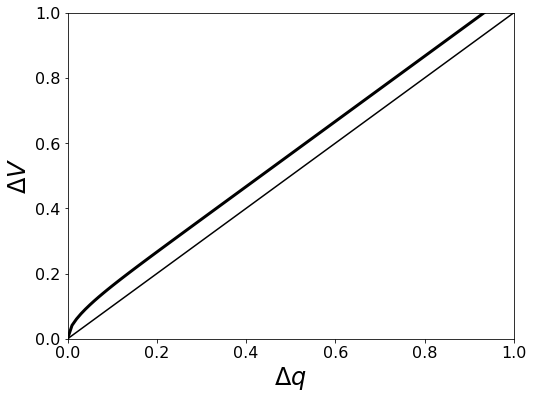

In [20]:
#Figure m
tau_arr = np.linspace(0, 1, 101)
Q = 1

plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

plt.figure(figsize = (8, 6))

sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q))
sffunc = lambda tau: tau + 1/(3*5*Q)
sfunc = lambda tau: tau + (1/(3*Q))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q)/salphas)))

siX_sol = np.zeros(len(tau_arr))
sfX_sol = np.zeros(len(tau_arr))
sX_sol = np.zeros(len(tau_arr))

for i in range(len(tau_arr)):
    siX_sol[i] = sifunc(tau_arr[i])
    sfX_sol[i] = sffunc(tau_arr[i])
    sX_sol[i] = sfunc(tau_arr[i])    

#plt.plot(tau_arr, siX_sol, ':k')
#plt.plot(tau_arr, sfX_sol, ':k')
plt.plot(tau_arr, sX_sol, '-k', linewidth=3)

plt.plot(tau_arr, tau_arr, '-k', linewidth=1.5)

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('$Δq$')
plt.ylabel('$ΔV$')
#axs[Q].title.set_text('Q = {}'.format(Q_arr[Q]))
#axs[Q].title.set_size(24)
#axs[Q].title.set_weight('bold')

plt.savefig('figm.png')